# 1. Presentación 
---

El presente trabajo para la materia de **Pronósticos de la FES Acatlán para la carrera de MAC**, tiene la finalidad de mostrar como el análisis, las herramientas computacionales y los métodos de predicción nos abren la puerta a un rápido manejo de las **series de tiempo**, estas a su vez son colecciones de observaciones sobre un determinado fenómeno efectuadas en sucesivos momentos del tiempo, usualmente **equiespaciados**. 

Corresponde a una realización de un proceso generador de datos, los cuales nos dan una descripción de un fenómeno de interés. 

El equipo de **Viva Cristo Rey (VCR)** nos complace en presentar un trabajo que recopila el aprendizaje llevado en el curso. 

Para introducirlos presentaremos soluciones a 4 series de tiempo las cuales tienen ciertas variaciones en su estructura y presentaremos **descripciones gráficas, análisis de soluciones y comparaciones entre los métodos** para su distinción, recordando que en todo pronóstico la manera de evaluar es a través del **error** que estas presentan.   


## 1.1 Caracteristicas del proyecto
___

Utilizaremos en entorno de **Jupyter notebook** para presentar el trabajo esto nos da una ventaja, ya que es mas fácil poder divulgar el trabajo. Tambien tiene la caracteristica que se puede **ejecutar en cualquier sitio** con las herramientas básicas e internet ya que nuestros datos se encuentran almacendados en **GitHub** esto nos da una ventaja ya que basta con este archivo para poder estudiar y visualizar el proyecto.


liga:https://github.com/senties08/Python_Pandas_Pronosticos

También para visualizar algunos datos hacemos uso de código $LaTeX$, ya que este le da una vista mucho mas atractiva al trabajo de comparación.


## 1.2 Iniciación Técnica y definición de algunas funciones comparación. 

### Nota: si no es relevante el codigo puede pasar a la sección (2).

Primero tenemos que saber que en Python se tienen que **importar** las librerías de **pandas** para poder hacer uso de los **Dataframe**, herramienta que es una matriz la cual sirve para estudiar y hacer las predicciones, ocupamos **Nunpy** para hacer **cálculos y visualizar** datos al igual que una de sus **subfunciones** la cual es **Matplotlib** para tener una visualización mas **estética** de las series de tiempo.

*Lo anterior se hace de la siguiente forma:*


In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as plt
import funciones as fx #libreria creada por nosotros para utilizar los pronosticos. 

Teniendo las herramientas básicas ya podríamos hacer algunas visualizaciones de los datos, en esta sección del trabajo viene algunas funciones que nos ayudaran al trayecto del trabajo, todo esto con finalidad de darle una estética y una forma más orgánica de ver los resultados y estudiarlos. 

Pero todo se puntualizará, utilizamos nombres intuitivos para hacer más cómodo el estudio y concentrarnos en las características de las series. 

*El siguiente fragmento de código nos ayudara a definir una función que nos mostrara las primeras (5) filas de las series de tiempo y su gráfica*

In [2]:
def Mostrar_Problema(a):
    print("Las primeras 5 filas de la serie son: ")
    if a==1:
        url_p1="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P1_Emigration_by_age_and_sex.csv"
        df_p1=pd.read_csv(url_p1,index_col=0 )
        print(df_p1.head(5))
        print("\n Y la grafica del problema 1:")
        #aqui se puede personalizar el grafico o cambiarle el color
        df_p1.plot(figsize=(15,3),color="r", linewidth=2, linestyle="--")
    elif a==2:
        url_p2="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P2_Air_Passenger_Transport.csv"
        df_p2=pd.read_csv(url_p2,index_col=0 )
        print(df_p2.head(4))
        print("Y la grafica del problema 2: ")
        #aqui se puede personalizar el grafico o cambiarle el color
        df_p2.plot(figsize=(15,3),color="m", linewidth=2, linestyle="--")  
    elif a==3:
        url_p3="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P3_Persons_Employed_In_Science___Techonology.csv"
        df_p3=pd.read_csv(url_p3,index_col=0 )
        print(df_p3.head(4))
        print("\n Y la grafica del problema 3: ")
        #aqui se puede personalizar el grafico o cambiarle el color
        df_p3.plot(figsize=(15,2),color="b", linewidth=2, linestyle="--")    
    elif a==4:
        url_p4="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P4_Datos_Lineal_GeoTime.csv"
        df_p4=pd.read_csv(url_p4,index_col=0 )
        print(df_p4.head(5))
        print("\n Y la grafica del problema 4: ")
        #aqui se puede personalizar el grafico o cambiarle el color
        df_p4.plot(figsize=(15,2),color="y", linewidth=2, linestyle="--")
    else:
        print("Numero de problema no valido")

#### Con estos pasos ya podremos empezar a visualizar nuestras series de tiempo para tratarlas.

# 2. Analisis y graficas de los problemas
---

La función:```Mostrar_Problema()``` recibe el argumento del número de serie de tiempo que queramos ver, en este caso solo son 4, nos dará las primeras 5 filas y un gráfico el cual estudiaremos para tomar las cáracteristicas principales y decidir un método que puede predecir el comportamiento de la serie. 


## 2.1 Problema 1: "Emigración por edad y sexo" 

Empezaremos con el **problema 1** que se denomina "Emigration by age and sex" datos relacionados a España que toma ambos sexos y un periodo total de 1996 a 2018. Un problema curioso ya que se nota un comportamiento curioso. Como siempre los datos solo nos muestra las huellas, pero el análisis de las noticias, la economía y la política nos dirán el porqué de los hechos. 

Las primeras 5 filas de la serie son: 
           Spain
TIME            
1996-12  3455940
1997-01  2898480
1997-02  3399058
1997-03  5318677
1997-04  5113152

 Y la grafica del problema 1:


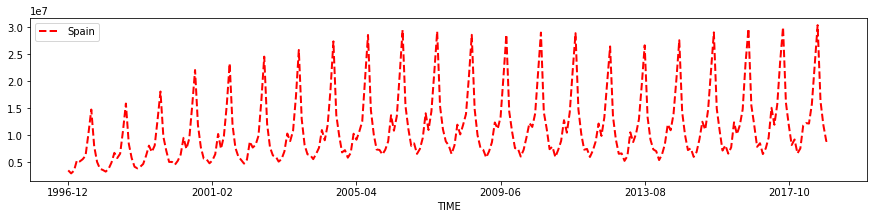

In [3]:
Mostrar_Problema(1)

Como podemos ver es una serie de tiempo con bastantes elementos, en cada una de las siguientes series vamos a tener una tabla similar a la siguiente, esto con la finalidad de resumir y observar los principales elementos ási como los posibles métodos a utilizar. 

**La tabla esta hecha en latex.**


\begin{equation}
\begin{array}{cc} \hline
\text{Elementos que componen a $S_t$} \\ \hline
\text{Tendencia}               & \text{Lineal Creciente}      \\
\text{Estacionalidad}          & S=12                  \\
\text{Ciclo}                   & \text{No}                    \\
\text{Error}                   & \text{Si}                    \\
\text{Datos atipicos}       & \text{No}                   \\ \hline
\end{array}
\end{equation}


La siguiente tabla resume que metodos son aplicables a la serie de tiempo 1, asi, como aquellos que no lo son, y, sus causas

\begin{array}{ccc} \hline
\text{Metodo}                                  & \text{Aplica} & \text{Causas}                                               \\ \hline
\text{Promedio Movil Simple}                   & \text{No}     & \text{La serie presenta tendencia y   estacionalidad}       \\
\text{Promedio Movil   Ponderado}              & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Promedio Movil   Doble}                  & \text{No}      & \text{La serie presenta   estacionalidad}                   \\
\text{Suavisamiento   Exponencial Simple}      & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Brown}                       & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de Holt}                          & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Multiplicativo} & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Aditivo}        & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Descomposicion}              & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad Anual}\\ \hline
\end{array}

## 2.2 Problema 2: "Pasajeros transportados"

Empezaremos con el **problema 2** que se denomina "Passengers carried" datos relacionados al transporte MALAGA-COSTA DEL SOL en avión y un periodo total de 2003 a 2017.

Las primeras 5 filas de la serie son: 
         MALAGA/COSTA DEL SOL airport
TIME                                 
2003-01                        309942
2003-02                        334931
2003-03                        458206
2003-04                        579312
Y la grafica del problema 2: 


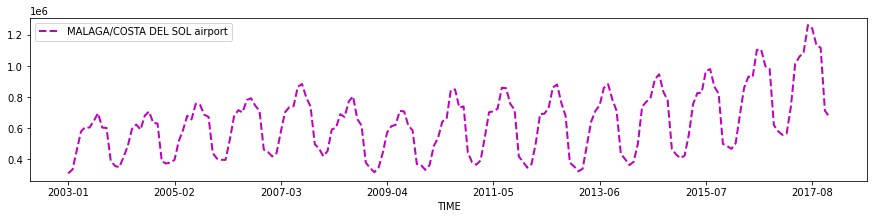

In [4]:
Mostrar_Problema(2)

**Tabla de resumen Problema 2**

\begin{equation}
\begin{array}{cc} \hline
\text{Elementos que componen a $S_t$} \\ \hline
\text{Tendencia}               & \text{Lineal Creciente}      \\
\text{Estacionalidad}          & \text{No}                  \\
\text{Ciclo}                   & \text{No}                    \\
\text{Error}                   & \text{Si}                    \\
\text{Datos atipicos}       & \text{No}                   \\ \hline
\end{array}
\end{equation}

La siguiente tabla resume que metodos son aplicables a la serie de tiempo 2, asi, como aquellos que no lo son, y, sus causas

\begin{array}{ccc} \hline
\text{Metodo}                                  & \text{Aplica} & \text{Causas}                                               \\ \hline
\text{Promedio Movil Simple}                   & \text{Si}     & \text{La serie no presenta estacionalidad}       \\
\text{Promedio Movil   Ponderado}              & \text{Si}      & \text{La serie no presenta estacionalidad}       \\
\text{Promedio Movil   Doble}                  & \text{Si}      & \text{La serie no presenta estacionalidad}                   \\
\text{Suavisamiento   Exponencial Simple}      & \text{Si}      & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Brown}                       & \text{Si}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de Holt}                          & \text{No}     & \text{La serie no presenta estacionalidad}       \\
\text{Metodo de   Holt-Winters Multiplicativo} & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Holt-Winters Aditivo}        & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Descomposicion}              & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad Anual }\\ \hline
\end{array}

## 2.3 Problema 3: "Personas empleadas en ciencia y tecnología"

Siguiendo con el **problema 3** denominado "Persons employed in science and technology" datos que muestran la creciente tendencia de interés en trabajar en el sector tecnológico, país Alemania, tomando de periodo de 1994 a 2020.

Las primeras 5 filas de la serie son: 
          Germany (until 1990 former territory of the FRG)
GEO/TIME                                                  
1994                                                 913.6
1995                                                 857.5
1996                                                 907.9
1997                                                 923.8

 Y la grafica del problema 3: 


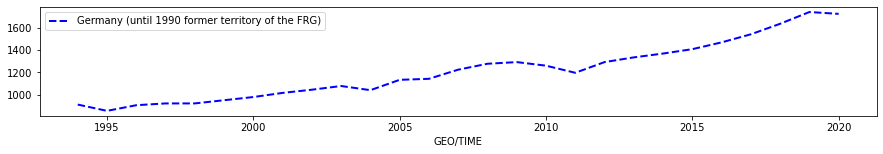

In [5]:
Mostrar_Problema(3)

**Tabla de resumen Problema 3**

\begin{equation}
\begin{array}{cc} \hline
\text{Elementos que componen a $S_t$} \\ \hline
\text{Tendencia}               & \text{Lineal Creciente}      \\
\text{Estacionalidad}          & S\approx12                  \\
\text{Ciclo}                   & \text{No}                    \\
\text{Error}                   & \text{Si}                    \\
\text{Datos atipicos}       & \text{No}                   \\ \hline
\end{array}
\end{equation}


La siguiente tabla resume que metodos son aplicables a la serie de tiempo 3, asi, como aquellos que no lo son, y, sus causas

\begin{array}{ccc} \hline
\text{Metodo}                                  & \text{Aplica} & \text{Causas}                                               \\ \hline
\text{Promedio Movil Simple}                   & \text{No}     & \text{La serie presenta tendencia y   estacionalidad}       \\
\text{Promedio Movil   Ponderado}              & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Promedio Movil   Doble}                  & \text{No}      & \text{La serie presenta   estacionalidad}                   \\
\text{Suavisamiento   Exponencial Simple}      & \text{No}      & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Brown}                       & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de Holt}                          & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Multiplicativo} & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Holt-Winters Aditivo}        & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad}       \\
\text{Metodo de   Descomposicion}              & \text{Si}     & \text{La serie presenta   tendencia y estacionalidad Anual}\\ \hline
\end{array}

## 2.4 Problema 4: "Personas con educación terciaria (CINE)"

El **problema 4** "Persons with tertiary education (ISCED)": La Educación terciaria es una denominación poco utilizada en México. 

A la formación que se imparte después del bachillerato o la preparatoria se le denomina generalmente educación superior, en lugar de terciaria. 

Referente a la serie los datos que muestran la tendencia a la alfabetización en el país Italia, periodo de 1994 a 2020.

Las primeras 5 filas de la serie son: 
          Italy
GEO/TIME       
1994      215.4
1995      213.8
1996      236.8
1997      240.5
1998      252.6

 Y la grafica del problema 4: 


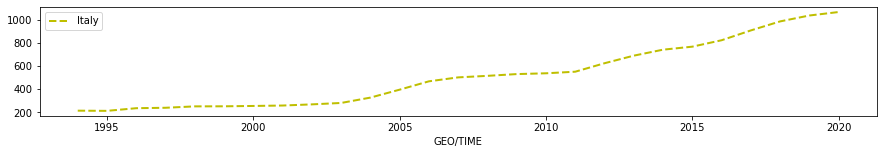

In [6]:
Mostrar_Problema(4)

**Tabla de resumen Problema 4**

\begin{equation}
\begin{array}{cc} \hline
\text{Elementos que componen a $S_t$} \\ \hline
\text{Tendencia}               & \text{Lineal Creciente}      \\
\text{Estacionalidad}          & \text{No}                  \\
\text{Ciclo}                   & \text{No}                    \\
\text{Error}                   & \text{Si}                    \\
\text{Datos atipicos}       & \text{No}                   \\ \hline
\end{array}
\end{equation}

La siguiente tabla resume que metodos son aplicables a la serie de tiempo 4, asi, como aquellos que no lo son, y, sus causas

\begin{array}{ccc} \hline
\text{Metodo}                                  & \text{Aplica} & \text{Causas}                                               \\ \hline
\text{Promedio Movil Simple}                   & \text{Si}     & \text{La serie no presenta estacionalidad}       \\
\text{Promedio Movil   Ponderado}              & \text{Si}      & \text{La serie no presenta estacionalidad}       \\
\text{Promedio Movil   Doble}                  & \text{Si}      & \text{La serie no presenta estacionalidad}                   \\
\text{Suavisamiento   Exponencial Simple}      & \text{Si}      & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Brown}                       & \text{Si}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de Holt}                          & \text{No}     & \text{La serie no presenta estacionalidad}       \\
\text{Metodo de   Holt-Winters Multiplicativo} & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Holt-Winters Aditivo}        & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad}       \\
\text{Metodo de   Descomposicion}              & \text{No}     & \text{La serie presenta tendencia pero no estacionalidad Anual }\\ \hline
\end{array}

# 3. Aplicación de métodos
___

Función Para calcular el error de los pronosticos

In [7]:

def errores(y_real,y_pred):

    df['e(t)'] = y_real - y_pred
    df['|e(t)|'] = np.abs(df['e(t)'])
    df['e(t)^2'] = df['e(t)']**2
    df['|e(t)|/y(t)'] = [df['|e(t)|'][i] / y_real[i] for i in range(len(y_real))]

    dam = np.mean(df['|e(t)|'])
    mse = np.mean(df['e(t)^2'])
    pema = np.mean(df['|e(t)|/y(t)'])

    t_err = pd.DataFrame([[dam, mse, pema*100]],columns=['DAM', 'MSE', 'PEMA'])

    print('Tabla de errores:\n', df,
          '\nEstadisticos de error:\n', t_err)
    

PROMEDIO SIMPLE

In [8]:
def prom_simp(tiempo ,y_real):
    data = pd.DataFrame()
    data['t'] = tiempo
    data['y'] = y_real
    
    data['pronostico'] = np.mean(y_real)
    ## poner todas las columnas...
    pred = {'t':len(tiempo) + 1, 'y': np.nan , 'pronostico' :np.mean(y_real) }
    data = data.append(pred, ignore_index = True)
    data['pronostico'][0] = np.nan
    print(data)
    
    print(f'el pronostco para el perido {len(tiempo) + 1} es: ', np.mean(y_real))
    
    #data['resta'] = data['y'] - data['pronostico']
    
    errores(data['y'], data['pronostico'])

PROMEDIO MOVIL SIMPLE

In [9]:
def PMS(n,tiempo, y_real):
    
    data = pd.DataFrame()
    
    data['t'] = tiempo
    data['y'] = y_real
    data['n='+ str(n)] = np.nan
    
    pred = {'t':len(tiempo) + 1, 'y': np.nan , 'n='+ str(n) :np.nan }
    data = data.append(pred, ignore_index = True)
    
    data['n='+ str(n)] = [np.mean(data['y'].iloc[i-n:i]) for i in range(len(data['y'])) ]
    pronostico = data['n='+ str(n)].loc[len(data['y'])-1]
    
    print(data)
    print(f'\n El pronosotico para el perdiodo {tiempo[-1] +1} es: ', pronostico, '\n')
    
    errores(data['y'],data['n='+ str(n)])

PROMEDIO MOVIL DOBLE

In [10]:
def Mostrar_Problema(a):
    if a==1:
        url_p1="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P1_Emigration_by_age_and_sex.csv"
        df_p1=pd.read_csv(url_p1,index_col=0 )
        print(df_p1.head(5))
        df_p1.plot(figsize=(10,6))
    
    elif a==2:
        url_p2="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P2_Air_Passenger_Transport.csv"
        df_p2=pd.read_csv(url_p2)
        print(df_p2.head(5))
        df_p2.plot(figsize=(10,6))
    elif a==3:
        url_p3="https://raw.githubusercontent.com/senties08/Python_Pandas_Pronosticos/main/P3_Persons_Employed_In_Science___Techonology.csv"
        df_p3=pd.read_csv(url_p3)
        print(df_p3.head(5))
    
    else:
        print("Numero de problema no valido")

Prueba para la biblioteca a crear con los metodos de descompocisión

In [11]:
fx.suma(2,3) # esta es la biblioteca que quiero implementar para que mande ahí los dataframe
             # se envía el dataframe y debe devolver el valor del pronostico. 

5